# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition:

In a statement,
> Given clinical parameters, about a patient, can we predict whether a patient has a heart disease or not?


## 2. Data
The original data came from the Cleveland Data from the UCI Machine Learning Repository

It is also available on kaggle - https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv

## 3. Evaluation

> If we can achieve 95% accuracy at predicting whether or not patient has heart disease during the proof of concept, we'll pursue this project.

## 4. Features

This is where you will get information about each feature in the data.

**Data Dictionary:**

1. **age** - Age in years.
2. **sex** - (1 = male; 0 = female)
3. **cp** - Chest pain type
   - 0: Typical angina - Chest pain related to decreased blood supply to the heart
   - 1: Atypical angina - Chest pain not related to the heart
   - 2: Non-anginal pain - Typically oesophageal spasms (non-heart related)
   - 3: Asymptomatic - Chest pain not showing signs of disease
4. **trestbps** - Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically a cause for concern.
5. **chol** - Serum cholesterol in mg/dL
   - Serum = LDL + HDL + 0.2 * triglycerides
   - Above 200 is a cause for concern.
6. **fbs** - (Fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)
   - '>126' mg/dL signals diabetes
7. **restecg** - Resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality
      - Can range from mild symptoms to severe problems
      - Signals non-normal heartbeat
   - 2: Possible or definite left ventricular hypertrophy
      - Enlarged heart's main pumping chamber
8. **thalach** - Maximum heart rate achieved
9. **exang** - Exercise-induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at the stress of the heart during exercise. An unhealthy heart will stress more.
11. **slope** - The slope of the peak exercise ST segment
    - 0: Upsloping - Better heart rate with exercise (uncommon)
    - 1: Flatsloping - Minimal change (typical healthy heart)
    - 2: Downsloping - Signs of an unhealthy heart
12. **ca** - Nuumber of major vessels (0-3) colored by fluoroscopy
    - Colored vessel means the doctor can see the blood passing through
    - The more blood movement, the better (no clots)
13. **thal** - Thallium stress result
    - 1, 3: Normal
    - 6: Fixed defect - Used to be a defect but okay now
    - 7: Reversible defect - No proper blood movement when exercising
14. **target** - Have disease or not (1=yes, 0=no) (= the predicted attribute)
 0=no) (= the predicted attribute)

#### Preparing the tools.

We are going to use Matplotlib, Pandas, NumPy for data analysis and manipulation.

In [1]:
# Importing all the tools that are required

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

#### Loading Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

#### Data Explorations (EDA or Exploratory Data Analysis):

The goal here is to find more about the data and become the subject matter expert in the dataset you're working with

1. What question(s) are you trying to solve?
2. What data do we have and how do we treat different data types?
3. What is missing from the data, and how to deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change, or remove features to get more out of your data?

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# How many of each class are there?
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

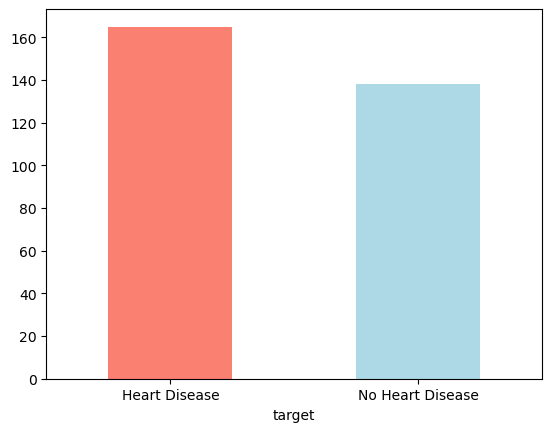

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])
plt.xticks([0, 1], ["Heart Disease", "No Heart Disease"], rotation=0);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

#### Heart Disease frequency with relation to sex.

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
## Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

In [12]:
# df["sex"].value_counts().plot(kind="bar", color=["salmon","lightblue"])
# plt.xticks([0, 1], ["Male", "Female"], rotation=0);

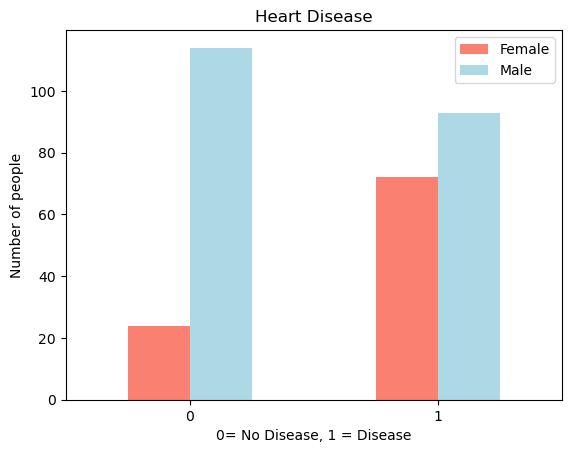

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Heart Disease")
plt.xlabel("0= No Disease, 1 = Disease")
plt.ylabel("Number of people")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

#### Age vs Maximum Heart Rate (thalach) for heart disease

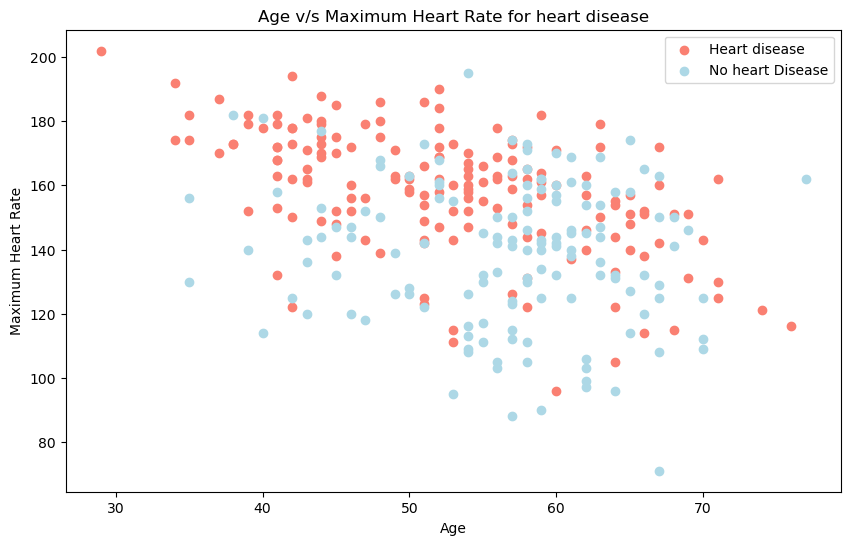

In [14]:
# Creating Figure
plt.figure(figsize = (10,6));

# Scatter with positive examples
plt.scatter(
    df.age[df.target ==1],
    df.thalach[df.target ==1],
    c = "salmon"
           )

# Scatter with neagtive examples
plt.scatter(
    df.age[df.target == 0],
    df.thalach[df.target == 0],
    c = "lightblue"
           )

# Add some useful info
plt.title('Age v/s Maximum Heart Rate for heart disease')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Heart disease', 'No heart Disease']);


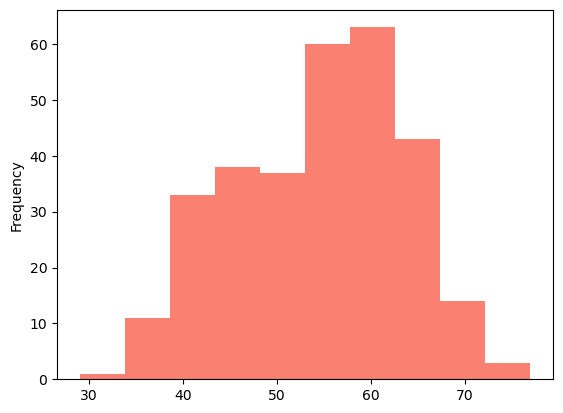

In [15]:
# Check the distribution of age column with histogram

df.age.plot.hist(color="salmon");

#### Comparing Chest pain (cp) with the target

**cp** - Chest pain type
   - 0: Typical angina - Chest pain related to decreased blood supply to the heart
   - 1: Atypical angina - Chest pain not related to the heart
   - 2: Non-anginal pain - Typically oesophageal spasms (non-heart related)
   - 3: Asymptomatic - Chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp ,df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

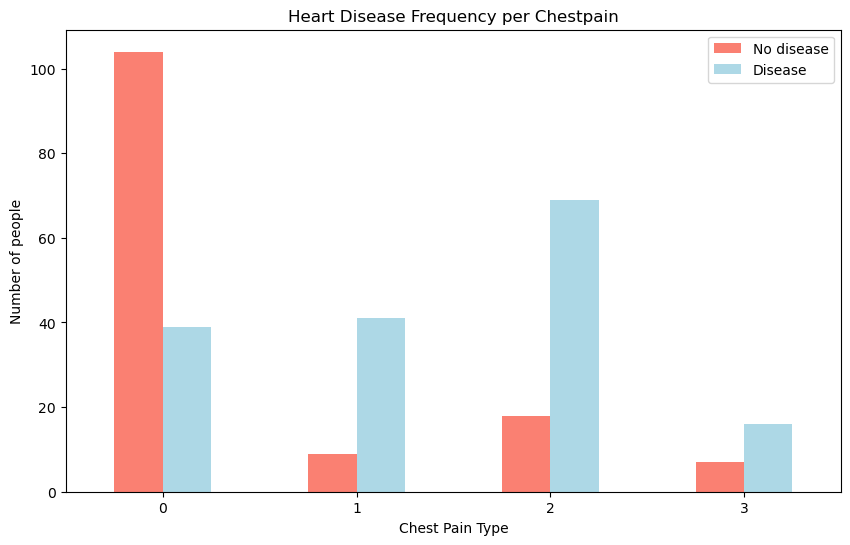

In [17]:
pd.crosstab(df.cp ,df.target).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency per Chestpain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of people")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [19]:
# Making a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

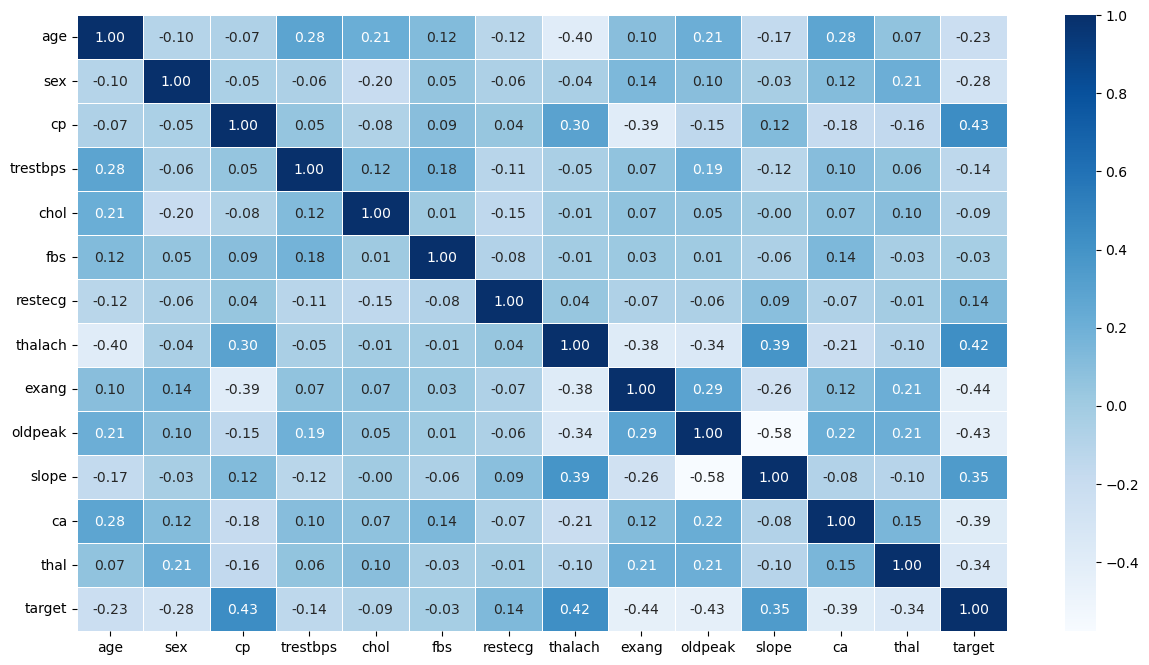

In [20]:
# Making correlation matrix visually

corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="Blues");

## 5. Modelling

In [21]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [22]:
# Split into X and Y:
X = df.drop('target', axis=1)
y = df["target"]

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
# Splitting into train and test data

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
X_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3

Now we have our data split into train and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test se

We will work on 3 different models:
1. LogisticRegression
2. KNearestNeighbours
3. RandomForestClassificationt.

In [26]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Creating a function to fit and score the ML Model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model Comparison

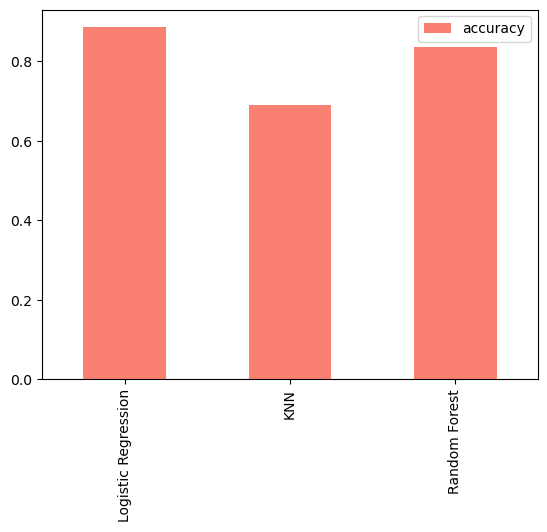

In [28]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar(color="salmon");

Now we have got our baseline model and we know that the base predictions aren't always the most accurate ones. So what to do?
<br>
Lets look at the following:

- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross validation
- Precision
- Recall
- F1 Score
- Classification report
- ROC Curve
- Area Under the curve (AUC):

#### Hyperparameter tuning (by hand)

In [29]:
# Let's tune KNN
train_scores = []
test_scores = []

# Creating a list for n_neighbors
neighbors = range(1, 21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i) 
    knn.fit(X_train, y_train)
    
    # Store the training and test scores in the dictionaries
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


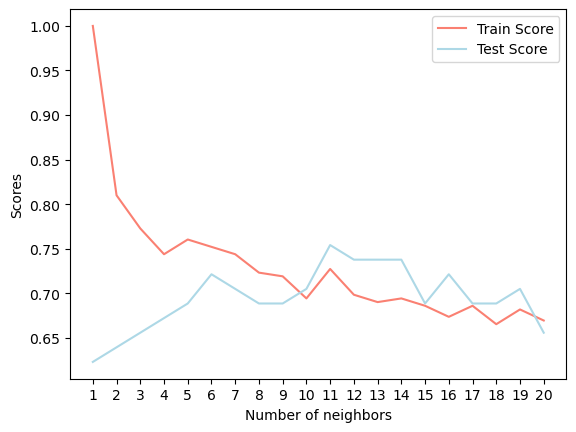

In [32]:
plt.plot(neighbors, train_scores, label = "Train Score", color="salmon")
plt.plot(neighbors, test_scores, label = "Test Score", color="lightblue")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

#### Hyperparameter tuning using RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [33]:
# Creating hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver": ["liblinear"]
}
# Creating hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10,1000,50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2)
}

Now we've got hyperparamter grids set up for each of our models, let's tune them using RandomizedSearchCV

In [34]:
# Tuning LogisticRegression
np.random.seed(42)

# Setting up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True
                               )
# Fitting it on the training data
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [37]:
# Tuning RandomForestClassifier
np.random.seed(42)

# Setting up random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
                          )

# Fitting it on the training data
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
rs_rf.score(X_test, y_test)

0.8688524590163934

#### Hyperparameter tuning using GridSearchCV
Since our LogisticRegression model provides the best results so far, we'll try and improve it using GridSearchCV

In [40]:
log_reg_grid = {
    "C": np.logspace(-4,4,30),
    "solver": ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [43]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Evaluating our model beyond accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classfication Report
* Precision
* Recall
* F1-Score
... and it would be great if used cross validation, wherever possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [44]:
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

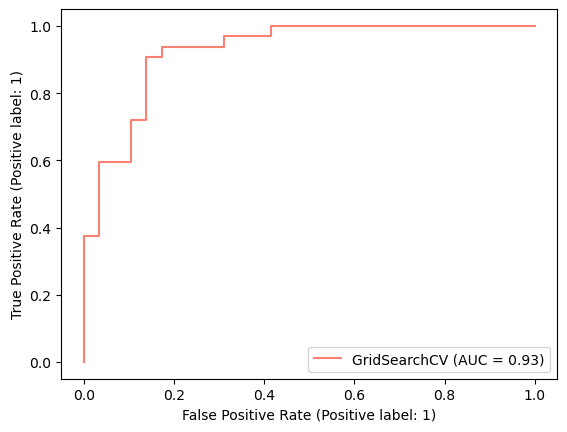

In [53]:
## Plotting ROC curve and calculating the ROC Curve
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test, color="salmon");

In [54]:
# Confusion Matrix
print(confusion_matrix(y_true=y_test,
                       y_pred=y_preds))

[[25  4]
 [ 3 29]]


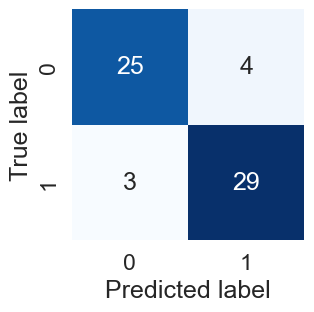

In [64]:
sns.set(font_scale=1.5) # Increasing font size

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, # Shows annotation on the boxes
                    cbar=False,
                    cmap="Blues")

    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

plot_conf_matrix(y_test, y_preds)


In [61]:
# Classification Report
print(classification_report(y_true=y_test,
                            y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Evaluation metrics using cross validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [65]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

In [67]:
#Cross Validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'accuracy')

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [68]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [71]:
#Cross validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'precision')

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [69]:
#Cross validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [70]:
#Cross validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv = 5,
                        scoring = 'f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

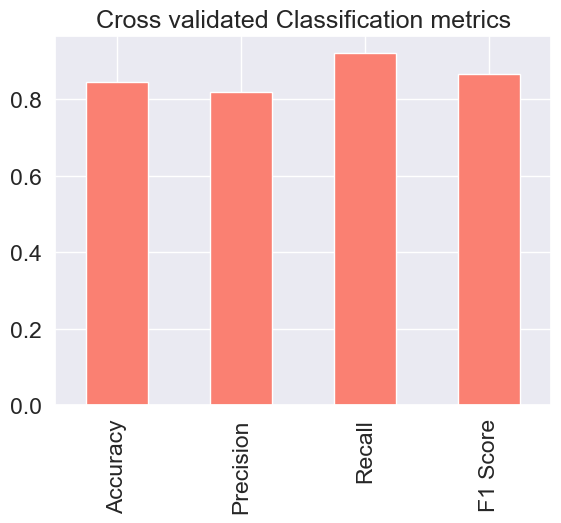

In [78]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1 Score': cv_f1},
                          index=[0])

cv_metrics.T.plot(kind='bar', 
                  title = "Cross validated Classification metrics",
                  legend = False,
                  color='salmon');